In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import mean_squared_error as mserror
from sklearn.ensemble import RandomForestRegressor as rfreg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
housing = pd.read_csv('AmesHousing.csv')

In [73]:
def split_train_and_test_data(dataset: pd.DataFrame, x_axis: str, y_axis: str):
    """
    splits data in to test and training data. Only works with two data types.
    """

    # Extract the independent and dependent variables (replace with your actual column names)
    x = dataset[x_axis].values.reshape(-1, 1)  # Feature (input)
    y = dataset[y_axis].values  # Target (output)

    #Split data into training and testing sets
    x_train, x_test, y_train, y_test = ttsplit(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

In [44]:

def evaluate_2d_model(model: Union[linreg, rfreg], y_test, y_pred, x_test):
    """
    Evaluates and displays mean square error and r-squared value between two data sets.

    Parameters:
    model(linreg, rfreg): AI model which is to be evaluated.
    y_test(): Y-values from test data.
    y_pred(): Y-vale predictions based on training data.
    x_test(): X-values from test data.
    """
    
    mse = mserror(y_test, y_pred)
    r_squared = model.score(x_test, y_test)
    #displays mean square error
    print(f"Mean Squared Error: {mse.round(0).astype(int)}")
    #displays r-squared
    print(f"R-squared: {r_squared}")

In [75]:
def visualize_2d_ai_results_asenfing_yvalue(y_test, y_pred, x_axis: str, y_axis: str):
    """
    Displays a graph compairong one set of values to another.

    Parameters:
    y_test(array): Data which is being compared to the other. Will be sortd in ascending order of the other dataset.
    y_pred(array): Defult data. Will be sorted in ascending order.
    x_axis(str): Label for x-axis.
    y_axis(ste): Label for y axis.
    """

    sorted_indices = np.argsort(y_test)  # Get indices to sort y_test in increasing order
    sorted_y_test = y_test[sorted_indices]  # Actual values sorted
    sorted_y_pred = y_pred[sorted_indices]  # Corresponding predicted values sorted

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot the sorted actual values
    plt.plot(sorted_y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)

    # Plot the sorted predicted values
    plt.plot(sorted_y_pred, label='Predicted Values', color='red', marker='x', linestyle='', markersize=5)

    # Add labels and title
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title('Comparison of Actual vs. Predicted Values')
    plt.legend()

    # Show the plot
    plt.show()

In [70]:
def create_2d_regression_ai(dataset: pd.DataFrame, x_axis: str, y_axis: str):
    """
    creates a liear regression model. Only works with two data types.

    parameters:
    dataset(pd.DataSet): Dataset which is to be used to train and test the ai.
    x_axis(str): The column from the dataset which is to be represented on the x-axis.
    y_axis(str): The column from the dataset which is to be represented on the y-axis.
    """

    x_train, x_test, y_train, y_test = split_train_and_test_data(dataset, x_axis, y_axis)

    # Create and train the model
    model = linreg()
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    print('Model type: linear regression')
    print(f"Regression line formula: {model.intercept_} + x{model.coef_}")
    evaluate_2d_model(model, y_test, y_pred, x_test)

    visualize_2d_ai_results_asenfing_yvalue(y_test, y_pred, x_axis, y_axis)

In [71]:
def create_2d_random_forrest(dataset: pd.DataFrame, x_axis: str, y_axis: str):
    """
    creates a random forest ai model. Only works with two data types.

    parameters:
    dataset(pd.DataSet): Dataset which is to be used to train and test the ai.
    x_axis(str): The column from the dataset which is to be represented on the x-axis.
    y_axis(str): The column from the dataset which is to be represented on the y-axis.
    """

    x_train, x_test, y_train, y_test = split_train_and_test_data(dataset, x_axis, y_axis)

    model = rfreg(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print('Model type: random forrest')

    evaluate_2d_model(model, y_test, y_pred, x_test)

    visualize_2d_ai_results_asenfing_yvalue(y_test, y_pred, x_axis, y_axis)

Model type: linear regression
Regression line formula: -89311.54045190802 + x[44174.67082795]
Mean Squared Error: 2796154625
R-squared: 0.651245661518071


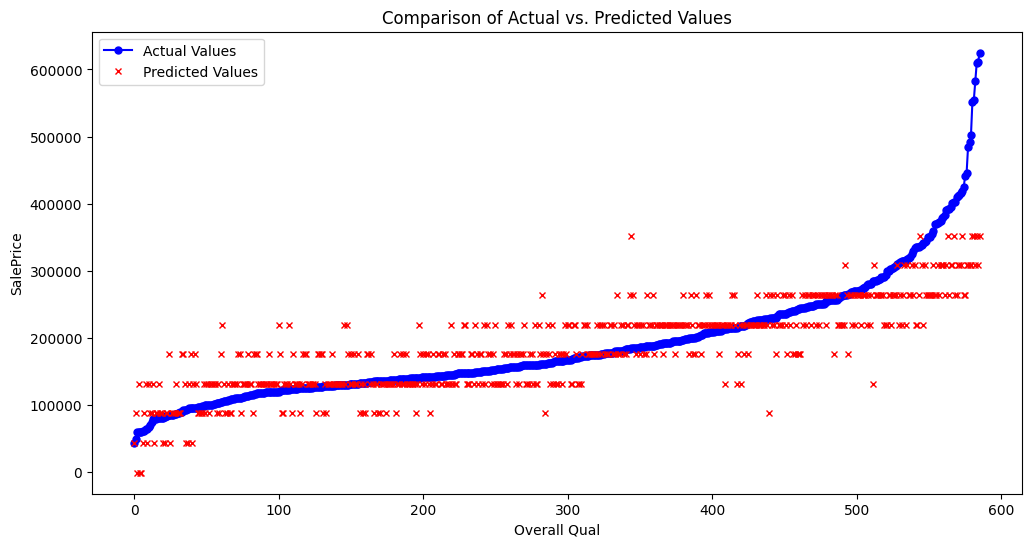

In [76]:
create_2d_regression_ai(housing, 'Overall Qual', 'SalePrice')

Model type: random forrest
Mean Squared Error: 2202459935
R-squared: 0.7252950710727633


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

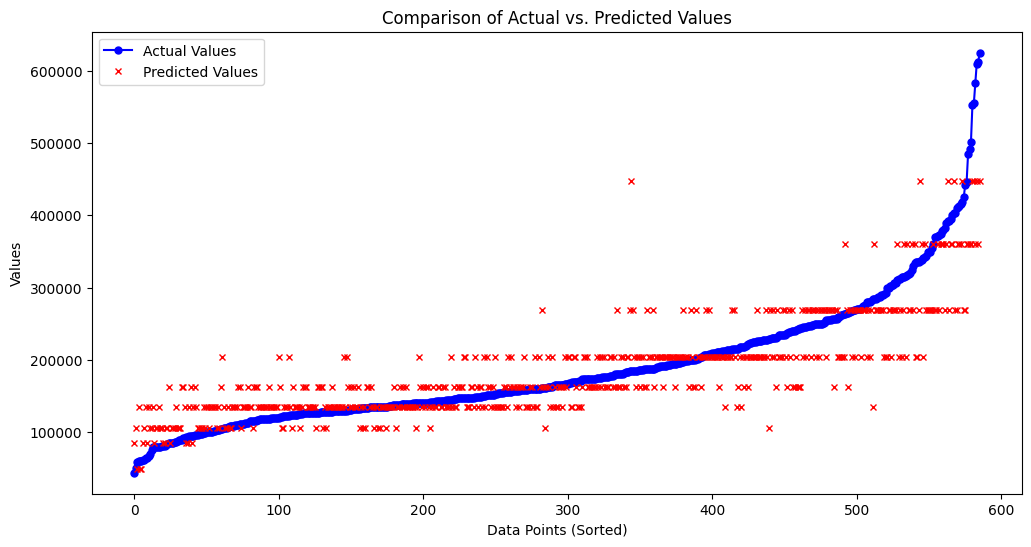

In [62]:
create_2d_random_forrest(housing, 'Overall Qual', 'SalePrice')

Model type: linear regression
Regression line formula: -2553287.161131087 + x[1386.37904367]
Mean Squared Error: 5284337220
R-squared: 0.34090356988553994


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

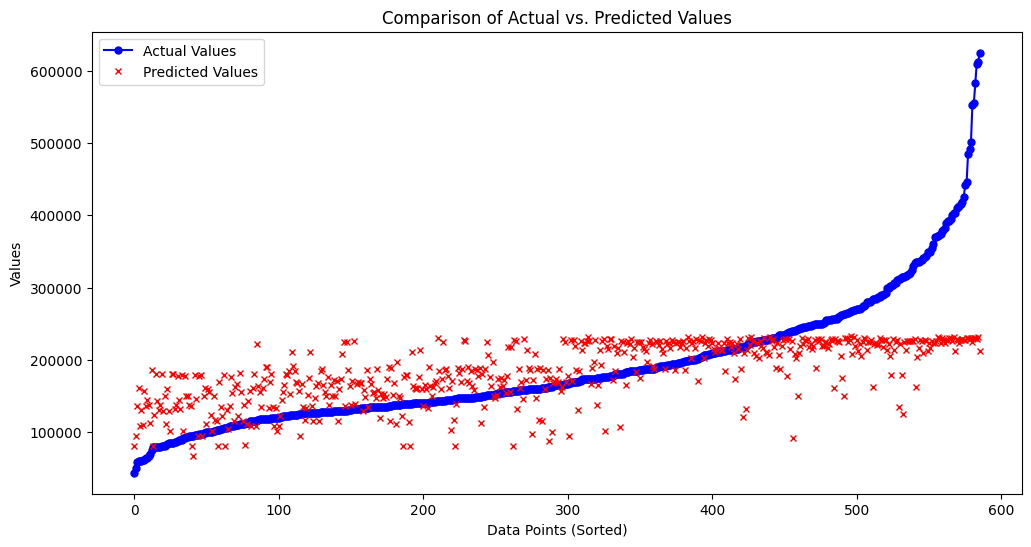

In [63]:
create_2d_regression_ai(housing, 'Year Built', 'SalePrice')

Model type: random forrest
Mean Squared Error: 4487921296
R-squared: 0.4402376718631983


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

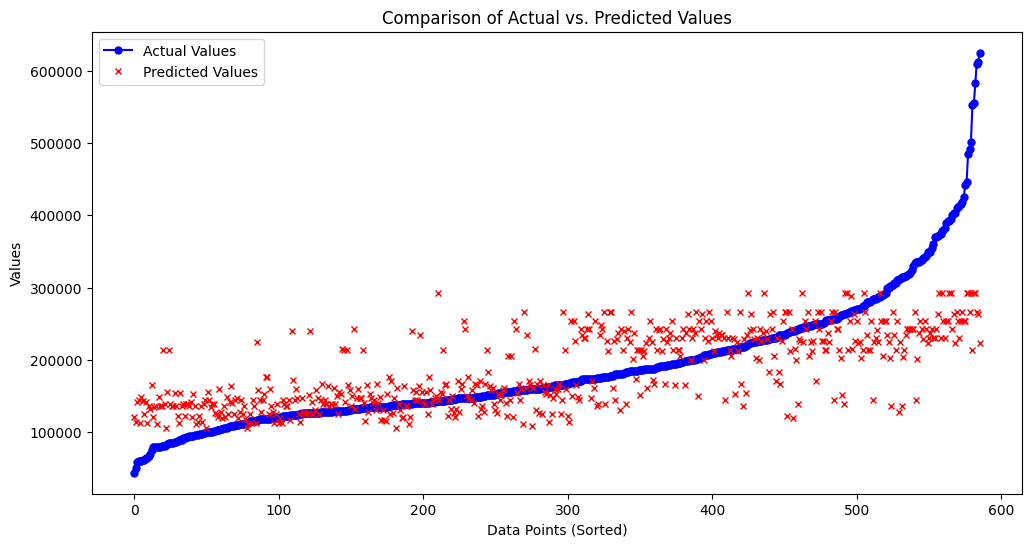

In [64]:
create_2d_random_forrest(housing, 'Year Built', 'SalePrice')

Model type: linear regression
Regression line formula: -3631921.0156088644 + x[1920.69047241]
Mean Squared Error: 5471050013
R-squared: 0.31761555278825615


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

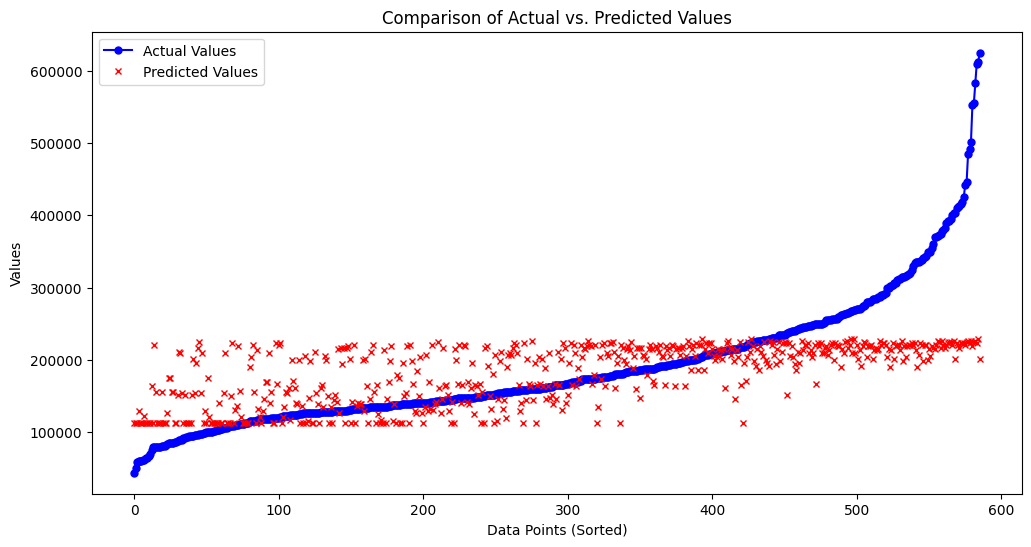

In [65]:
create_2d_regression_ai(housing, 'Year Remod/Add', 'SalePrice')

Model type: random forrest
Mean Squared Error: 5264176487
R-squared: 0.3434181457037786


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

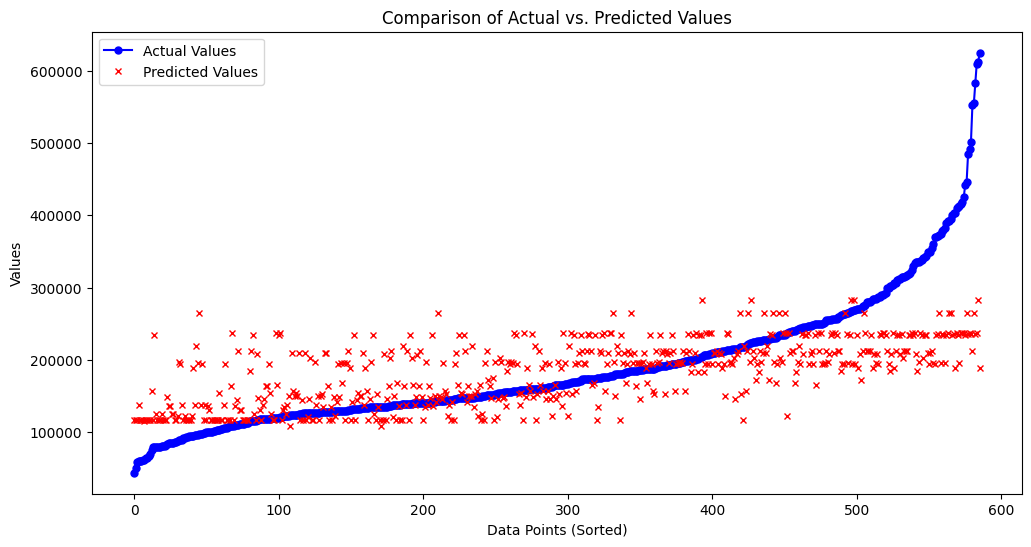

In [66]:
create_2d_random_forrest(housing, 'Year Remod/Add', 'SalePrice')